< [Supervised Learning](../ica05/Supervised_Learning.ipynb) | Contents (TODO) |  [Cluster Analysis](../ica07/Cluster_Analysis.ipynb) >

<a href="https://colab.research.google.com/github/stephenbaek/bigdata/blob/master/in-class-assignments/ica06/Distance_and_Similarity.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

# Distance and Similarity

## 1. The Iris Data Set

The [Iris data set](https://archive.ics.uci.edu/ml/datasets/iris) is a popular "hello world" data set for data scientists. The data set contains three species of Iris flowers, including *Iris setosa*, *Iris versicolor*, and *Iris virginica* (see below).

<table>
    <tr>
        <td><img src=https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/220px-Kosaciec_szczecinkowaty_Iris_setosa.jpg><br>Iris setosa</td>
        <td><img src=https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/220px-Iris_versicolor_3.jpg><br>Iris setosa</td>
        <td><img src=https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/220px-Iris_virginica.jpg><br>Iris setosa</td>
    </tr>
    <tr>
        <td colspan=3><center>The three species of Iris</center></td>
    </tr>
</table>

These three spiecies are different in their sepal and petal dimensions. The data set contains four attributes, namely *sepal length*, *sepal width*, *petal length*, and *petal width*, for each flower.
![](https://www.integratedots.com/wp-content/uploads/2019/06/iris_petal-sepal-e1560211020463.png)


### 1.1. Reading the Iris data set

The Iris data set is available at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Iris). There are several files in the repository, but all we need here is the data file https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data, which is *comma-separated*.

In our previous session, we learned how to read a comma-separated file using pandas (see Section 4 of [ICA02 - How to Read and Represent Data]((../ica02/How_to_Read_and_Represent_Data.ipynb))). We first import numpy and pandas:

In [1]:
import numpy as np
import pandas as pd

#### Assignment
Write a code to read https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data file to a pandas DataFrame. Set `header=None` and `names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'iris_class']` to manually set the column names. Name your DataFrame `data`.

In [2]:
data = # YOUR CODE HERE

,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


To make our job easier in the future, we will convert the Sting data in `iris_class` column to ordinal variables: 

In [72]:
data_ordinal = data.replace({'iris_class': {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}})
data_ordinal.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,iris_class
137,6.4,3.1,5.5,1.8,2
8,4.4,2.9,1.4,0.2,0
62,6.0,2.2,4.0,1.0,1
113,5.7,2.5,5.0,2.0,2
116,6.5,3.0,5.5,1.8,2


Once properly loaded, you should be able to run the following line to draw a histogram:

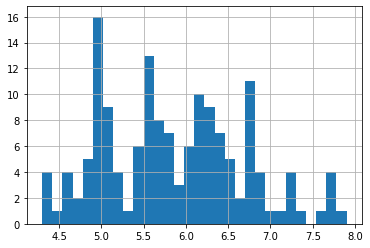

In [69]:
data.sepal_length.hist(bins=30)

There are a few other ways to visualize the data. For example, below is an example to visualize the sepal length distribution for different classes of irises.

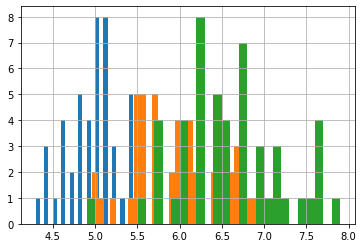

In [68]:
np.where(data.iris_class == 'Iris-setosa')
for class_type in data.iris_class.unique():
    data.sepal_length.iloc[np.where(data.iris_class == class_type)].hist(bins=30)

#### Assignment
- Write a code to draw the similar histogram plots for other attributes, i.e. sepal width, petal length, and petal width.
- For each attribute, can you tell the difference between the three species? You can just "eyeball".
- Based on your answer above, build a simple `if-else` logic to classify irises. Test your logic on the Iris data set. How accurate can you be?

In [ ]:
# PROVIDE YOUR ANSWERS HERE. IF NECESSARY, CREATE NEW CODE/TEXT CELLS.

Alternatively, we could also visualize the data set in a 2-D scatter plot, each of the axes indicating one of those attributes. The type of the flower can be color-coded. We will use a library called `matplotlib` for visualization, which can be imported like this:

In [71]:
import matplotlib.pyplot as plt

Now, simply `plt.scatter()` will do the job for drawing a scatter plot. If you are already familiar with MATLAB, `matplotlib` is a lot similar to MATLAB visualization functions. For more details, see: https://matplotlib.org/gallery/index.html

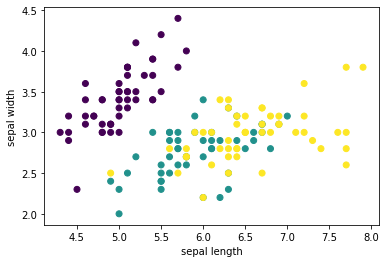

In [75]:
plt.scatter(data_ordinal.sepal_length, data_ordinal.sepal_width, c=data_ordinal.iris_class)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

#### Assignment

- Write a code to draw the scatter plot for all the other combinations than 'sepal length' - 'sepal width'.
- For each plot, can you draw a straight line separating the different species? (again, eyeballing) What is the slope and the intercept of the line you came up with, roughly?
- Implement a linear classifier using the line equations you manually came up with. What is the accuracy?

In [ ]:
# PROVIDE YOUR ANSWERS HERE. IF NECESSARY, CREATE NEW CODE/TEXT CELLS.

### 1.2. K-Nearest Neighbors

K-nearest neighbors, or *KNN*, is one of the simplest machine learning (?) algorithm for supervised learning. There are many python libraries that provide nice, pre-defined implementations of KNN, but here, we will just implement everything from scratch on our own. Implementing a KNN is not actually difficult at all, and from the experience of implementing it, you will get to achieve some deeper insights on how things are working. 

#### Train-Test Split

In Iris data set, we have the total of 150 flower samples. We will randomly split these into two groups: group A with 120 flowers and group B with 30 flowers. We will "train" our KNN model based on the flowers in group A, and we will *pretend* the group B is a set of *queries* that we don't know the answer for. For example, assume you are building an app for telling the user which species of Iris it is, based on the sepal and petal shapes. Group A is the set of data that is already available to you (app developer) and Group B is the queue of queries that your users will randomly throw in. In data science, "Group A" the set of data you used for building a model is called *training set* and "Group B" the remainder of the data you left out is called *test set*. 

In Python world, there are a few pre-defined functions that are quite convenient for spliting train and test sets. Not that it is difficult to implement things from scratch, let's just take advantage of one of those functions. 

In [78]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_ordinal, test_size=0.2)

In [80]:
train

,sepal_length,sepal_width,petal_length,petal_width,iris_class
22,4.6,3.6,1.0,0.2,0
139,6.9,3.1,5.4,2.1,2
60,5.0,2.0,3.5,1.0,1
53,5.5,2.3,4.0,1.3,1
31,5.4,3.4,1.5,0.4,0
136,6.3,3.4,5.6,2.4,2
118,7.7,2.6,6.9,2.3,2
92,5.8,2.6,4.0,1.2,1
29,4.7,3.2,1.6,0.2,0
44,5.1,3.8,1.9,0.4,0


In [81]:
test

,sepal_length,sepal_width,petal_length,petal_width,iris_class
122,7.7,2.8,6.7,2.0,2
110,6.5,3.2,5.1,2.0,2
86,6.7,3.1,4.7,1.5,1
73,6.1,2.8,4.7,1.2,1
33,5.5,4.2,1.4,0.2,0
146,6.3,2.5,5.0,1.9,2
102,7.1,3.0,5.9,2.1,2
25,5.0,3.0,1.6,0.2,0
1,4.9,3.0,1.4,0.2,0
67,5.8,2.7,4.1,1.0,1


Now, to train KNN, we will convert `train` DataFrame to a numpy array.

In [20]:
train_np = train.to_numpy()
print(train_np)

[[5.8 2.8 5.1 2.4 2. ]
 [7.7 3.8 6.7 2.2 2. ]
 [5.  3.3 1.4 0.2 0. ]
 [5.6 2.8 4.9 2.  2. ]
 [6.  2.2 5.  1.5 2. ]
 [5.1 3.8 1.5 0.3 0. ]
 [6.8 3.2 5.9 2.3 2. ]
 [5.  3.2 1.2 0.2 0. ]
 [5.6 3.  4.1 1.3 1. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [6.2 2.9 4.3 1.3 1. ]
 [6.9 3.2 5.7 2.3 2. ]
 [4.5 2.3 1.3 0.3 0. ]
 [5.4 3.4 1.5 0.4 0. ]
 [6.4 3.2 5.3 2.3 2. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.1 3.7 1.5 0.4 0. ]
 [6.5 3.  5.5 1.8 2. ]
 [7.9 3.8 6.4 2.  2. ]
 [6.3 2.3 4.4 1.3 1. ]
 [4.9 3.  1.4 0.2 0. ]
 [6.8 3.  5.5 2.1 2. ]
 [5.1 3.3 1.7 0.5 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [6.7 3.  5.  1.7 1. ]
 [6.3 2.5 4.9 1.5 1. ]
 [5.2 2.7 3.9 1.4 1. ]
 [6.8 2.8 4.8 1.4 1. ]
 [4.9 2.5 4.5 1.7 2. ]
 [5.6 2.9 3.6 1.3 1. ]
 [5.8 2.6 4.  1.2 1. ]
 [5.5 3.5 1.3 0.2 0. ]
 [6.7 3.1 4.4 1.4 1. ]
 [6.2 3.4 5.4 2.3 2. ]
 [5.6 2.5 3.9 1.1 1. ]
 [5.1 3.8 1.6 0.2 0. ]
 [6.4 2.8 5.6 2.1 2. ]
 [4.8 3.  1.4 0.3 0. ]
 [7.2 3.  5.8 1.6 2. ]
 [5.4 3.9 1.7 0.4 0. ]
 [6.1 2.8 4.  1.3 1. ]
 [5.4 3.  4.5 1.5 1. ]
 [5.1 3.5 1

Note that the first four columns are attributes we are going to use for making prediction (called *predictors*) and the last column is the species label we would like to predict (*output*). For simplicity, we will explicitly split those columns into `train_X` and `train_Y`.

In [82]:
train_X = train_np[:, 0:4]
train_Y = train_np[:, 4]

print(train_X)
print(train_Y)

[[5.8 2.8 5.1 2.4]
 [7.7 3.8 6.7 2.2]
 [5.  3.3 1.4 0.2]
 [5.6 2.8 4.9 2. ]
 [6.  2.2 5.  1.5]
 [5.1 3.8 1.5 0.3]
 [6.8 3.2 5.9 2.3]
 [5.  3.2 1.2 0.2]
 [5.6 3.  4.1 1.3]
 [4.9 3.1 1.5 0.1]
 [5.  3.6 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [6.9 3.2 5.7 2.3]
 [4.5 2.3 1.3 0.3]
 [5.4 3.4 1.5 0.4]
 [6.4 3.2 5.3 2.3]
 [4.6 3.1 1.5 0.2]
 [5.1 3.7 1.5 0.4]
 [6.5 3.  5.5 1.8]
 [7.9 3.8 6.4 2. ]
 [6.3 2.3 4.4 1.3]
 [4.9 3.  1.4 0.2]
 [6.8 3.  5.5 2.1]
 [5.1 3.3 1.7 0.5]
 [4.7 3.2 1.3 0.2]
 [6.7 3.  5.  1.7]
 [6.3 2.5 4.9 1.5]
 [5.2 2.7 3.9 1.4]
 [6.8 2.8 4.8 1.4]
 [4.9 2.5 4.5 1.7]
 [5.6 2.9 3.6 1.3]
 [5.8 2.6 4.  1.2]
 [5.5 3.5 1.3 0.2]
 [6.7 3.1 4.4 1.4]
 [6.2 3.4 5.4 2.3]
 [5.6 2.5 3.9 1.1]
 [5.1 3.8 1.6 0.2]
 [6.4 2.8 5.6 2.1]
 [4.8 3.  1.4 0.3]
 [7.2 3.  5.8 1.6]
 [5.4 3.9 1.7 0.4]
 [6.1 2.8 4.  1.3]
 [5.4 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [6.6 2.9 4.6 1.3]
 [6.3 2.7 4.9 1.8]
 [6.3 3.4 5.6 2.4]
 [5.6 2.7 4.2 1.3]
 [6.5 3.  5.2 2. ]
 [5.5 2.5 4.  1.3]
 [6.3 3.3 6.  2.5]
 [4.8 3.  1.4 0.1]
 [6.  3.4 4.

Now, lets simulate a user query from the test data set. In this example, we'll simply pick the first row of the test set and name it `query`.

In [24]:
query = test.iloc[0]
print(query)

sepal_length    5.5
sepal_width     4.2
petal_length    1.4
petal_width     0.2
iris_class      0.0
Name: 33, dtype: float64


Here, similarly, we'll convert it to a numpy array and "pretend" we don't know the species of this query by deleting the information. However, since we are going to check later whether or not the prediction is correct, we will save it somewhere for our record.

In [84]:
query = query.to_numpy()
ground_truth = query[4]
query = np.delete(query, 4)
print(query)

Now, we will find the which flower in the train set is the most similar to the query flower. To do this, we first compute the difference between each of the train data and the query:

In [88]:
diff = np.abs(train_X - query)  # absolute difference
print(diff)

[[0.3 1.4 3.7 2.2]
 [2.2 0.4 5.3 2. ]
 [0.5 0.9 0.  0. ]
 [0.1 1.4 3.5 1.8]
 [0.5 2.  3.6 1.3]
 [0.4 0.4 0.1 0.1]
 [1.3 1.  4.5 2.1]
 [0.5 1.  0.2 0. ]
 [0.1 1.2 2.7 1.1]
 [0.6 1.1 0.1 0.1]
 [0.5 0.6 0.  0. ]
 [0.7 1.3 2.9 1.1]
 [1.4 1.  4.3 2.1]
 [1.  1.9 0.1 0.1]
 [0.1 0.8 0.1 0.2]
 [0.9 1.  3.9 2.1]
 [0.9 1.1 0.1 0. ]
 [0.4 0.5 0.1 0.2]
 [1.  1.2 4.1 1.6]
 [2.4 0.4 5.  1.8]
 [0.8 1.9 3.  1.1]
 [0.6 1.2 0.  0. ]
 [1.3 1.2 4.1 1.9]
 [0.4 0.9 0.3 0.3]
 [0.8 1.  0.1 0. ]
 [1.2 1.2 3.6 1.5]
 [0.8 1.7 3.5 1.3]
 [0.3 1.5 2.5 1.2]
 [1.3 1.4 3.4 1.2]
 [0.6 1.7 3.1 1.5]
 [0.1 1.3 2.2 1.1]
 [0.3 1.6 2.6 1. ]
 [0.  0.7 0.1 0. ]
 [1.2 1.1 3.  1.2]
 [0.7 0.8 4.  2.1]
 [0.1 1.7 2.5 0.9]
 [0.4 0.4 0.2 0. ]
 [0.9 1.4 4.2 1.9]
 [0.7 1.2 0.  0.1]
 [1.7 1.2 4.4 1.4]
 [0.1 0.3 0.3 0.2]
 [0.6 1.4 2.6 1.1]
 [0.1 1.2 3.1 1.3]
 [0.4 0.7 0.  0. ]
 [1.1 1.3 3.2 1.1]
 [0.8 1.5 3.5 1.6]
 [0.8 0.8 4.2 2.2]
 [0.1 1.5 2.8 1.1]
 [1.  1.2 3.8 1.8]
 [0.  1.7 2.6 1.1]
 [0.8 0.9 4.6 2.3]
 [0.7 1.2 0.  0.1]
 [0.5 0.8 3.

Now, let's take the sum of differences across the different attributes.

In [90]:
sum_diff = np.sum(diff, axis=-1)
print(sum_diff)

[ 7.6  9.9  1.4  6.8  7.4  1.   8.9  1.7  5.1  1.9  1.1  6.   8.8  3.1
  1.2  7.9  2.1  1.2  7.9  9.6  6.8  1.8  8.5  1.9  1.9  7.5  7.3  5.5
  7.3  6.9  4.7  5.5  0.8  6.5  7.6  5.2  1.   8.4  2.   8.7  0.9  5.7
  5.7  1.1  6.7  7.4  8.   5.5  7.8  5.4  8.6  2.   5.8  8.3  7.2  2.
  1.9  1.3  9.2  0.7  6.9  5.4  5.1  5.8  5.7  1.7  1.8 10.2  0.7  6.4
  5.4  6.7  7.9  0.7  2.   5.6  6.2  6.3  6.3  9.6  2.8  7.8  1.7  1.
  5.7  1.9  6.9  8.3  8.4  6.4  1.4  1.2  6.2  8.5  4.6  8.7  7.1  1.9
  2.4  4.9  0.7  6.5  1.9  0.8  6.4  5.6  7.2  9.7  5.1  8.9  1.5  2.2
  8.9  8.   7.3  5.2  7.3  6.9  7.1  1.9]


Finally, we will find the k-nearest neighbors by picking the ones that have the smallest differences. To this, `np.argpartition()` can be extremely useful, especially when you have large data. The function is similar to `np.sort` in a sense that it tries to sort the input array in the ascending order. However, it sorts the array only up to the first k elements and simply ignores the remainder.

In [91]:
k = 5
idx = np.argpartition(sum_diff, k)
print(sum_diff[idx])  # Notice that only the first k elements have been sorted.

[ 0.7  0.7  0.7  0.7  0.8  0.8  0.9  1.   1.   1.4  1.1  1.2  1.7  1.
  1.2  1.5  1.8  1.2  1.7  1.3  1.9  1.8  1.1  1.4  1.9  1.7  1.9  5.5
  7.3  6.9  4.7  5.5  7.3  6.5  7.6  5.2  7.5  8.4  2.   8.7  1.9  5.7
  5.7  8.5  6.7  7.4  8.   5.5  7.8  5.4  8.6  2.   5.8  8.3  7.2  2.
  6.8  9.6  9.2  9.9  6.9  5.4  5.1  5.8  5.7  7.9  2.1 10.2  7.9  6.4
  5.4  6.7  7.9  3.1  2.   5.6  6.2  6.3  6.3  9.6  2.8  7.8  8.8  6.
  5.7  1.9  6.9  8.3  8.4  6.4  1.9  5.1  6.2  8.5  4.6  8.7  7.1  1.9
  2.4  4.9  8.9  6.5  1.9  7.4  6.4  5.6  7.2  9.7  5.1  8.9  6.8  2.2
  8.9  8.   7.3  5.2  7.3  6.9  7.1  7.6]


Finally, the labels of the k-nearest neighbors are summarized as:

In [92]:
knn = train_Y[idx[:k]]
print(knn)

[0. 0. 0. 0. 0.]


Whichever label achieves the majority vote, it is going to be the predicted species of the query.

In [99]:
uni, count = np.unique(knn, return_counts=True)
print('Predicted Class: ', uni[np.argmax(count)])
print('Ground Truth: ', ground_truth)             # compare with the ground truth

Predicted Class:  0.0
Ground Truth:  0.0


#### Assignment

- Implement a code to classify all the flowers in the test data set.
- Compare the predicted result with the actual ground truth. What is the accuracy?
- Plot the accuracy as you vary k=1, 2, 3, ..., 20. Does the accuracy changes along k? Is there any pattern you can observe?

< [Supervised Learning](../ica05/Supervised_Learning.ipynb) | Contents (TODO) |  [Cluster Analysis](../ica07/Cluster_Analysis.ipynb) >

<a href="https://colab.research.google.com/github/stephenbaek/bigdata/blob/master/in-class-assignments/ica06/Distance_and_Similarity.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>